# Conding exercises for Critical Points

### Import numpy library and matplotlib

In [1]:
import numpy
import matplotlib.pyplot as plt

### In case you need to install it, run this cell 

In [ ]:
!pip3 install numpy
!pip3 install matplotlib

## Function, first and second derivatives
Because the methods require for us to have the function, the first and second derivatives defined in python we will do prior to their implementations



In [2]:
def f(x):
    return x**4 - 4*x**3 + 4*x**2
def df(x):
    return 4*x**3 - 12*x**2 + 8*x
    
def df2(x):  # Second derivative
    return 12*x**2 - 24*x + 8


## 1. Root Find with Newton's Method

### Newton's Method for Root Finding:

**Function and Derivative:**
The function we're considering is:
$$ f(x) = x^4 + 4x^3 + 4x^2$$
Its derivative is:
$$ f'(x) = 4x^3 - 12x^2 + 8x $$

**Method Overview:**
The Newton-Raphson method updates our estimate for the root using the formula:
$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$
This method iteratively refines the root approximation.

**Stopping Criteria:**
We use two stopping criteria:
1. When the absolute value of $ f(x) $ is less than $ 10^{-5} $ indicating proximity to a root.
2. After 10 iterations, to prevent endless loops in case the method doesn't converge.

**Implementation:**
The Python function `newton_method` implements this approach. When run, it will provide the approximate root and the number of iterations it took to either converge to the root or hit the iteration limit.


In [3]:
def newton_method(x0, tol=1e-5, max_iter=10):
    """
    Newton's method for root finding.
    
    Parameters:
    - x0: Initial guess
    - tol: Tolerance level (default is 1e-5)
    - max_iter: Maximum number of iterations (default is 10)

    Returns:
    - Root of the function f(x) if found within max_iter iterations and tolerance, else returns the latest estimate
    """
    x = x0
    for i in range(max_iter):
        # Compute the next approximation using Newton's method formula
        x_next = x - f(x)/df(x)
        
        # Check the stopping criterion
        if abs(f(x_next)) < tol:
            print(f"Root found at x = {x_next}, after {i+1} iterations.")
            return x_next
        
        # Update x for the next iteration
        x = x_next
        
    print(f"Stopped after {max_iter} iterations. Latest estimate for root is x = {x}.")
    return x

### Run the code

In [4]:
x0 = 0.1
root = newton_method(x0)

Root found at x = 0.001407967242655117, after 6 iterations.


## 2.Minimization with Gradient Descent

### Gradient Descent for Function Minimization:

**Function and Gradient:**
The function we're targeting for minimization is:
$$ f(x) = x^4 + 4x^3 + 4x^2$$
Its gradient (or derivative, in this one-dimensional case) is:
$$ f'(x) = 4x^3 - 12x^2 + 8x $$


**Method Overview:**
Gradient Descent updates our estimate for the local minimum using the rule:
$$ x_{n+1} = x_n - \alpha f'(x_n) $$
Where $\alpha $ is the learning rate. This method iteratively shifts the current estimate in the direction of the steepest decrease of the function.

**Stopping Criteria:**
The algorithm stops when the difference between the function values in consecutive steps is smaller than $ 10^{-5} $. If this doesn't occur, the method will stop after 10,000 iterations as a fallback.

**Implementation:**
The Python function `gradient_descent` captures this method. It returns both the approximate point of the minimum and a history of all $ x $ values considered during the iterations. This history can be useful for visualization purposes later on.


In [5]:
import numpy as np
def gradient_descent_minimize(learning_rate=0.01, tol=1e-5, x0=0.1):
    """
    Function to perform minimization using gradient descent.
    
    Parameters:
    - learning_rate: Step size for each iteration.
    - tol: Tolerance value for stopping criterion.
    - x0: Initial guess.
    
    Returns:
    - x: Approximate minimum point.
    - errors: List containing value of f(x) for each iteration.
    """
    x = x0
    errors = [f(x)]
    
    # Run gradient descent until change in f(x) value is smaller than tol
    while True:
        x_new = x - learning_rate * df(x)
        if np.abs(f(x_new) - f(x)) < tol:
            break
        x = x_new
        errors.append(f(x))
    
    return x, errors

### Run the code

In [6]:
# Call the function and get the minimum point and error list
min_gd, gd_errors = gradient_descent_minimize()
print(f"Approximate minimum point using Gradient Descent: x = {min_gd}")

Approximate minimum point using Gradient Descent: x = 0.00387025495013399


## 3.Minimization with Newton's Method 

### Newton's Method for Function Minimization:

**Function and Derivative:**
The function we're considering is:
$$ f(x) = x^4 + 4x^3 + 4x^2$$
Its derivative is:
$$ f'(x) = 4x^3 - 12x^2 + 8x $$
And the second derivative (Hessian for this 1D case) is:
$$ f''(x) = 12x^2 -24x + 8$$

**Method Overview:**
Newton's method for optimization updates our estimate for the local minimum using the rule:
$$ x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)} $$
This method tries to approximate the function locally by a quadratic function and then jumps straight to the minimum of that quadratic.

**Stopping Criteria:**
The algorithm stops when the difference between the function values in consecutive steps is smaller than $ 10^{-5} $. If this doesn't occur, the method will stop after 10 iterations as a fallback.

**Implementation:**
The Python function `newton_minimization` encapsulates this method. It outputs both the approximate point of the minimum and a history of all \( x \) values considered during the iterations. This history can be beneficial for subsequent visualization and comparison.


In [9]:
def newton_method_optimize(tol=1e-5, x0=0.1):
    """
    Function to perform minimization using Newton's method.
    
    Parameters:
    - tol: Tolerance value for stopping criterion.
    - x0: Initial guess.
    
    Returns:
    - x: Approximate minimum point.
    - errors: List containing value of f(x) for each iteration.
    """
    x = x0
    errors = [f(x)]
    
    # Run Newton's method until change in f(x) value is smaller than tol
    while True:
        x_new = x - df(x)/df2(x)
        if np.abs(f(x_new) - f(x)) < tol:
            break
        x = x_new
        errors.append(f(x))
    
    return x, errors

### Run the code

In [10]:
# Initial guess
x0 = 0.1
min_point, errors = newton_method_optimize(x0=x0)
print(f"Approximate minimum point using Newton's method for optimization: x = {min_point:.5f}")

Approximate minimum point using Newton's method for optimization: x = -0.00055


## 4: Comparison between Gradient Descent and Newton’s Method for Optimization

Gradient Descent took 42 iterations.
Newton's method took 3 iterations.


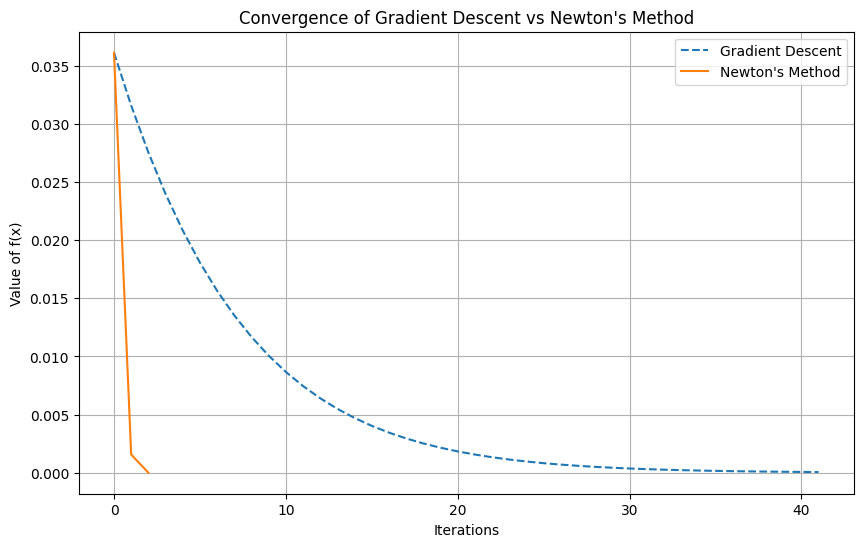

In [12]:
# Run both methods
min_gd, gd_errors = gradient_descent_minimize()
min_newton, newton_errors = newton_method_optimize()

# Compare number of iterations taken to converge
print(f"Gradient Descent took {len(gd_errors)} iterations.")
print(f"Newton's method took {len(newton_errors)} iterations.")

# Plot the convergence of the methods
plt.figure(figsize=(10, 6))
plt.plot(gd_errors, label='Gradient Descent', linestyle='--')
plt.plot(newton_errors, label="Newton's Method", linestyle='-')
plt.title("Convergence of Gradient Descent vs Newton's Method")
plt.xlabel("Iterations")
plt.ylabel("Value of f(x)")
plt.legend()
plt.grid(True)
plt.show()